In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
import batman
from scipy.optimize import minimize
from scipy.signal import find_peaks
# Disclaimer: Most of this is unoriginal and ripped directly from a random online tutorial.

In [2]:
data_planet = pd.read_excel("ep206103150.xlsx")

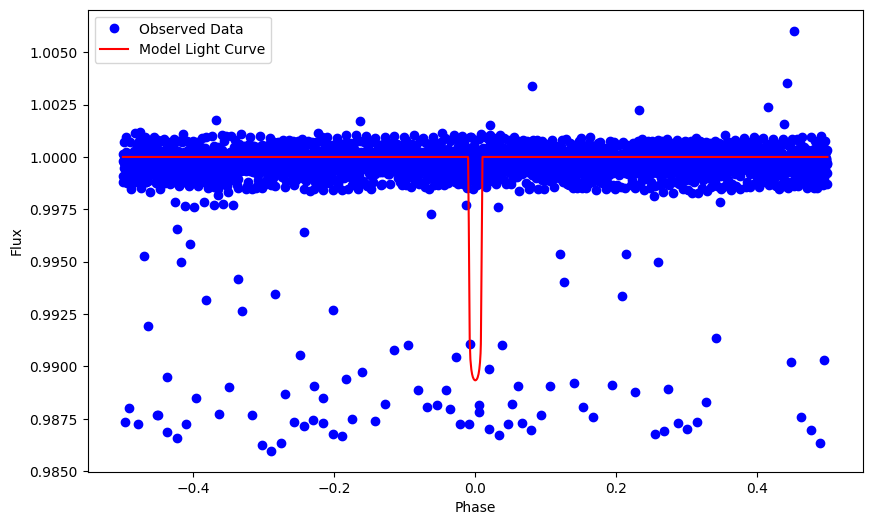

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import batman

# Loading the dataset
data_planet = pd.read_excel("ep206103150.xlsx")
time_data = np.array(data_planet['time'])
flux_data = np.array(data_planet['flux'])

# Set initial parameters for the BATMAN model, these should be based on prior knowledge or estimates
initial_params = batman.TransitParams()
initial_params.t0 = 0.5                    # time of inferior conjunction; mid-transit time in days
initial_params.per = 1.5                   # orbital period in days (estimated)
initial_params.rp = 0.1                    # planet radius (in units of stellar radii)
initial_params.a = 15                      # semi-major axis (in units of stellar radii)
initial_params.inc = 88                    # orbital inclination (in degrees)
initial_params.ecc = 0                     # eccentricity
initial_params.w = 90                      # longitude of periastron (in degrees)
initial_params.limb_dark = "quadratic"     # limb darkening model
initial_params.u = [0.1, 0.3]              # limb darkening coefficients

# Generate the model light curve
m = batman.TransitModel(initial_params, time_data)  # Initializes the model
flux_model = m.light_curve(initial_params)          # Generates light curve

# Phase folding the time data around the period
phase_folded_time = ((time_data - initial_params.t0) / initial_params.per) % 1
phase_folded_time[phase_folded_time > 0.5] -= 1  # Centering around 0

# Sorting the phase and corresponding flux data for plotting
sort_order = np.argsort(phase_folded_time)
sorted_phase = phase_folded_time[sort_order]
sorted_flux = flux_data[sort_order]

# Plotting the observed data and the model (phase folded)
plt.figure(figsize=(10, 6))
plt.plot(sorted_phase, sorted_flux, 'bo', label='Observed Data')
plt.plot(sorted_phase, flux_model[sort_order], 'r-', label='Model Light Curve')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.legend()
plt.show()
